# Topic: Progressive Image Transmission in Image codec based on Set Partitioning in Hierarchical Trees
 - *Họ và tên*: Đỗ Quang Huy
 - *MSSV*: 20021365

## Introduction
Set Partitioning in Hierarchical Trees (SPIHT) is a powerful image compression method based on wavelet transform. Introduced in 1995, this method has received worldwide acclaim and attention. It's also used in many applications because of its strengths. One of them is progressive transmission capability, which provides the method the flexibility in displaying image. Like almost modern browsers, the image displaying will depend on how the network quality is, the image firstly could be abstract and messy, but after a little while it could be more clear and we totally could retrive the lossless quality if we want. This report propose how the method supports progressive image transmission in detail and also illustrate it with code example.

## Background and related work
The wavelet transform is a very effective method for compressing. After applied to an image, this transformation produces as many coefficients as there are pixels in the image (i.e., there is no compression yet since it is only a transform). These coefficients can then be compressed more easily because the information is statistically concentrated in just a few coefficients [1].

Embedded zerotree wavelet algorithm (EZW) as developed by J. Shapiro in 1993, enables scalable image transmission and decoding. It is based on four key concepts: first, it should be a discrete wavelet transform or hierarchical subband decomposition; second, it should predict the absence of significant information when exploring the self-similarity inherent in images; third, it has entropy-coded successive-approximation quantization, and fourth, it is enabled to achieve universal lossless data compression via adaptive arithmetic coding. [2]

Set Partitioning in Hierarchical Trees is a compression method which based on the idea of EZW. The implementation of it was widely applied in many field such as ECG Signal compression [3], 2-D or 3-D Image compression. In this report, 2-D image compression is implemented in the example code. 

## Details of SPIHT Compression Method
### I. Progressive Image transmission
Assuming the original image is $p$, comprises $p_{i,j}$ which represents the pixel at coordinate $(i,j)$. The wavelet transform process can be simplified as $$c = \Omega (p)$$

Where $ \Omega (.)$ represents a unitary hierarchical subband transformation. $c$ must has a same shape as $p$. And also each $c_{i,j}$ can be represented with a fixed-point binary format, which mean all coefficent can be represent in binary with a fixed maximum digit.

In progressive transmission scheme, the decoder reconstructs the image without requirement to receive all data from the sender. After receiving and recognized some coefficents, the decoder can start reconstructing the image. The more coefficents the decoder received, the more clearly the reconstructed image is. After receving enough coefficent, the image can be considered nearly lossless since the compression may not be reversible. There're some perfect reversible methods which use an integer multiresolution transform such as S+P transform, but because of the report's purpose, we just use simple method for easily demonstrate the progressive transmission.

Initially, the decoder set the received coefficent list $\hat c$ as empty. $\hat c$ values will be aggregated and refined by the decoder as it receives data. To obtain the image, the decoder will reconstruct it from $\hat c$.
$$\hat{p} = \Omega ^{-1}(\hat{c})$$

Considering progressive transmission scheme, which the coefficents in $c$ is not simultaneously be sent but part by part. So for a optimized scheme, we should send values according to size of distortion reduction. 

Previously we discussed about $c_{i,j}$ can be represented with a fixed-point binary format, which meant we can use its necessary bit length to rank the distortion deduction.

Let's consider an example in 1D dimension, $c$ has four values $c_{1} = 22 $, $c_{2} = 11$, $c_{3}=4$, $c_{4}=2$ are being sent. Each of them can be represented with a fixed-point binary format, length $k=5$ in this example. Their binary representations are shown below.


| c\index | 1 | 2 | 3 | 4 | 5 | Value |
|---|---|---|---|---|---|:---:|
| 1 | 1 | 0 | 1 | 1 | 0 |22 |
| 2 |   | 1 | 0 | 1 | 1 |11 |
| 3 |   |   | 1 | 0 | 0 |4  |
| 4 |   |   |   | 1 | 0 |2  |

The MSE distortion 
$$D_{MSE}(p - \hat{p}) = D_{MSE}(c - \hat{c}) = \frac{1}{N} \sum_{i}^{}(c_{i} - \hat{c_{i}})^{2} $$

Initially, $D_{0} = 625$

In the this report's propose method, we will clarify at the decoder the bits at column index 1 first, which meant after the first iteration, at the decoder, the value of coefficents are shown as below. The coefficent which is empty considered insignificant.

| c\index | 1 | 2 | 3 | 4 | 5 | Value |
|---|---|---|---|---|---|:---:|
| 1 | 1 | 0 | 0 | 0 | 0 |16 |
| 2 |   |   |   |   |   |0 |
| 3 |   |   |   |   |   |0  |
| 4 |   |   |   |   |   |0  |

$$D_{1} = 177$$

Next, we will clarify the bit at column 2 and repeat until the reconstruct $\hat{c}$ satifised our requirement.

| c\index | 1 | 2 | 3 | 4 | 5 | Value |
|---|---|---|---|---|---|:---:|
| 1 | 1 | 0 | 0 | 0 | 0 |16 |
| 2 |   | 1 | 0 | 0 | 0 |8  |
| 3 |   |   |   |   |   |0  |
| 4 |   |   |   |   |   |0  |

$$D_{2} = 65$$

| c\index | 1 | 2 | 3 | 4 | 5 | Value |
|---|---|---|---|---|---|:---:|
| 1 | 1 | 0 | 1 | 0 | 0 |20 |
| 2 |   | 1 | 0 | 0 | 0 |8  |
| 3 |   |   | 1 | 0 | 0 |4  |
| 4 |   |   |   |   |   |0  |

$$D_{3} = 17$$

| c\index | 1 | 2 | 3 | 4 | 5 | Value |
|---|---|---|---|---|---|:---:|
| 1 | 1 | 0 | 1 | 1 | 0 |22 |
| 2 |   | 1 | 0 | 1 | 0 |10  |
| 3 |   |   | 1 | 0 | 0 |4  |
| 4 |   |   |   | 1 | 0 |2  |

$$D_{4} = 1$$

| c\index | 1 | 2 | 3 | 4 | 5 | Value |
|---|---|---|---|---|---|:---:|
| 1 | 1 | 0 | 1 | 1 | 0 |22 |
| 2 |   | 1 | 0 | 1 | 1 |11 |
| 3 |   |   | 1 | 0 | 0 |4  |
| 4 |   |   |   | 1 | 0 |2  |

$$D_{5} = 0$$

### II. SPIHT Idea
The previous section has described the proposed progressive transmission scheme. But it has a serious problem which is the size of data we need to transfer. Aside the original data, we must also send addition revelant data so the decoder can reconstruct it, whose cost is not acceptable in real situation. So A. Said, W. A. Pearlman et al [4] proposed a method which allows progressive transmission but with optimize cost. The main idea is forming a spatial orientation tree from pixels to compress data.

| c\index | 1 | 2 |...|
|---|---|---|:---:|
| 1 | 1 | **x**| ... |
| 2 | **x** | 1 | ... |
| 3 | **x**| **x**| ... |
| 4 | **x**| **x**| ... |

This table is the iteration 2 in the above example, the idea of the SPIHT is those bit 0 are not necessary to send so the data will be compressed. Those bit 0 are considered **insignificant** and the hierarchical which comprises of bit 0 in a certain iteration is considered **insignificant**.

However, to achieve it, encoder has to tell the decoder which part is insignificant in each iteration. So both encoder and decoder has to use the same relationship rules when forming spatial orientation tree from the data and also same algorithm in iterating through pixels and subsets, which represent a hierarchical of a tree.

### III. SPIHT Coding Algorithm
In this section, we will discuss deeply about the coding algorithm which proposed in A. Said, W. A. Pearlman et al [4]. As we discussed in the previous section, we must define the relationship rules in forming spatial orientation tree first. Each specific situation has their own effective way to form a tree. For our example, we will form based on "hierarchical pyramid", whose each node correspond to a pixel, its direct offsprings correspond to the pixels at the same spatial orientation in the next finer level of pyramid. Every node can have either 4 offsprings or do not have any offsprings. In detail, except the node at coordinate $(0,0)$ and the leaf. Offsprings of a node at coordinate $(i,j)$ is

$$\mathcal{O}(i,j)=\{(2i, 2j), (2i +1,2j), (2i, 2j+1), (2i+1,2j+1)\}$$

All descendants of a node $(i,j)$ denoted by $\mathcal{D}(i,j)$.

Descendants of a node $(i,j)$ except their offsprings $\mathcal{L}(i,j)$.

Hence, $\mathcal{L}(i,j)=\mathcal{D}(i,j)-\mathcal{O}(i,j)$.

Set of coordinate of all spatial orientation tree root (nodes in the highest pyramid level) $\mathcal{H} = \{(0,1), (1,0), (1,1) \}$.

To achieve the way sending data proposed above, we have to decide a coefficent is *significant* or *insignificant*. Consider our above example with 4 coefficents 22, 11, 4, 2. In the first iteration, only the bit from "22" was sent, which meant in that iteration, 22 is *significant* and 11, 4, 2 is *insignificant*. So to decide which coefficent is *significant* in an iteration mathematically, we define $k$ equal to the maximum bit needed to represent a coefficent. And in each iteration, only $c(i,j)$, which satisfies $c(i,j)>2^{k}$, will be considered *significant*. 

The same goes with a subsets. Consider a subset $\mathcal{T}$, it will be *significant* if
$$\max_{(i,j)\in \mathcal{T}} \{ \left | c(i,j) \right |\} > 2^{k}$$

Knowing a set or a coefficant is *significant* or not is crucial to this algorithm. So to make it clear, let's use the function

$$
S_{k}(\mathcal{T})=
\begin{cases}
1 & \quad \text{if $\max_{(i,j)\in \mathcal{T}} \{ \left | c(i,j) \right |\} > 2^{k}$}\\ 
0 & \quad \text{otherwise}
\end{cases}
$$

With a single pixel, $S_{k}(i,j)$ will be alias of $S_{k}(\{(i,j)\})$.

Next we need to define the algorithm to iterating through pixels and subsets. A. Said, W. A. Pearlman et al [4] propose an algorithm which based on 3 list **LIP**, which stands for *List of Insignificant Pixels*, **LIS**, which stands for *List of Insignificant Sets* and **LSP**, which stands for *List of Significant Pixels*. In all list, each entry is identified by a coordinate $(i,j)$, which in **LIP** and **LSP** represents invidual pixel and in the **LIS** represent either $\mathcal{D}(i,j)$(type A) or $\mathcal{L}(i,j)$(type B). 

Before dive in coding example, let's review the pseudocode of the algorithm first.
 1. **Initialization:** 
     * $k=\left \lfloor log_{2}(max_{i,j}\{ \left | c(i,j) \right | \}) \right \rfloor$
     * $LIP = \{ \mathcal{H}, (0,0) \}$ (since the pixel at $(0,0)$ is a root but do not have offspring)
     * $LIS = \mathcal{H}$
     * $LSP = \{ \}$
 2. **Sorting pass:**
    1. **Sorting pass in LIP**:
        * For each entries $(i,j)$ in **LIP**:
            * Output $S_{k}(i, j)$
            * If $S_{k}(i, j)=1$ then move $(i,j)$ to **LSP** and output the signbit of $c(i,j)$
    2. **Sorting pass in LIS**:
        * For each entries $(i,j)$ in **LIS**:
            * If the entry is type A:
                * Output $S_{k}(\mathcal{D}(i, j))$
                * If $S_{k}(\mathcal{D}(i, j))=1$:
                    * For each ${k,l} \in \mathcal{O}(i,j)$:
                        * Output $S_{k}(k, l)$
                        * If $S_{k}(k, l) = 1$ then output  its signbit. Append to **LSP**
                        * If $S_{k}(k, l) = 0$ then append to **LIP**
                    * If $\mathcal{L}(i, j)\neq \varnothing $:
                        * Append $(i,j)$ to the end of **LIS** as type B
                        * Remove current type A entry $(i,j)$ from **LIS**.
            * If the entry is type B:
                * Output $S_{k}(\mathcal{L}(i, j))$
                * If $S_{k}(\mathcal{D}(i, j))=1$:
                    * Append type A entry $(k,l)$ to **LIS** with $(k,l) \in \mathcal{O}(i, j)$
                    * Remove current type B entry $(i,j)$ from **LIS**
    3. **Refinement pass**:
        * For each entry $(i,j)$ in **LSP** (except those included in last sorting pass):
            * Output the k-th most bit of $\left | c(i,j) \right |$
    4. **Quantization-step update**:
        * Decrease $k$ by 1 and repeat the step 2 until certain requirement is meet or until $k < 0$

## Analysis and evaluation
In this section, we will implement the proposed coding algorithm in python code to demonstrate the process and evaluate the result of our coding.

Initially, we need to install PyWavelets to support wavelet transform. And then import needed library.

In [3]:
!pip install PyWavelets
!pip install opencv-python

You should consider upgrading via the 'd:\anaconda3\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'd:\anaconda3\python.exe -m pip install --upgrade pip' command.


In [4]:
import numpy as np
import matplotlib.pyplot as plt

import pywt
import pywt.data
import numpy as np
import cv2

Then we define the relationship rule $\mathcal{D}(i,j)$, $\mathcal{O}(i,j)$, $\mathcal{L}(i,j)$ in the tree and also supporting function i.e significant function $S_{k}(i,j)$ or reconstruct number from bits function since we save bits as string. 

In [5]:
# Significant function
def S(N, k):
    if np.abs(N) > 2 ** k:
        return 1
    return 0

def signbit(N):
    if N > 0:
        return '0'
    return '1'

def O(index, length):
    (i, j) = index
    if index == (0, 0):
        return []
    if i < length / 2 and j < length / 2:
        return [(2*i, 2*j), (2*i + 1, 2*j), (2*i, 2*j + 1), (2*i + 1, 2*j + 1)]
    return []

def D(index, length):
    if index == (0, 0):
        return []
    offspring = O(index, length)
    i = 0
    while i < len(offspring):
        offspring_1 = O(offspring[i], length)
        offspring += offspring_1
        i += 1
    return offspring

def L(index, length):
    descendant = D(index, length)
    return descendant[4:]

def reconstruct_num(bits):
    out = 0
    for bit in bits[1:]:
        out = (out << 1) | bit
    if bits[0] == 0:
        return out
    return - out
    
def reconstruct_img(img, w, h):
    new_img = [[0 for x in range(w)] for y in range(h)]
    for i in range(h):
        for j in range(w):
            new_img[i][j] = reconstruct_num(img[i][j])
    return new_img

We test the image with two level of wavelet decomposition (*1-level and 2-level*) for evaluation. Each decomposition function will have a corresponding reconstructing function.

Since our method currently just support coding integer coefficents so in *1-level wavelet decomposition*, the image coefficents are multiplied by **2**. With *2-level wavelet decomposition*, coefficents are multiplied by **4**.

In [6]:
# Divide image into 4 subband LL LH HL HH
def mp_subbands(image, size):
    # Perform SVD on the image
    K = 2
    M = size
    N = size
    b = image.reshape(K, M, K, N)
    c = b.transpose(0, 2, 1, 3)
    d = c.reshape(-1, M, N)
    LL = d[0]
    LH = d[1]
    HL = d[2]
    HH = d[3]
    return LL, LH, HL, HH

# 1-level decomposition 
def wavelet_decomposition_1(img, scale=True):
    coeffs2 = pywt.dwt2(img, 'haar')
    LL, (LH, HL, HH) = coeffs2
    L = np.concatenate((LL, LH), axis=1)
    H = np.concatenate((HL, HH), axis=1)
    if scale:
        return np.concatenate((L, H), axis=0) * 2
    else:
        return np.concatenate((L, H), axis=0)

# 2-level decomposition 
def wavelet_decomposition_2(img):
    coeffs2 = pywt.dwt2(img, 'haar')
    LL, (LH, HL, HH) = coeffs2
    LL = wavelet_decomposition_1(LL, False)
    L = np.concatenate((LL, LH), axis=1)
    H = np.concatenate((HL, HH), axis=1)
    return np.concatenate((L, H), axis=0) * 4

# 1-level reconstruct
def wavelet_reconstruct_1(img):
    img = img / 2
    LL, LH, HL, HH = mp_subbands(img, 256)
    img1 = pywt.idwt2((LL, (LH, HL, HH)), 'haar')

    return img1

# 2-level reconstruct 
def wavelet_reconstruct_2(img):
    img = img / 4
    LL, LH, HL, HH = mp_subbands(img, 256)
    LL1, LH1, HL1, HH1 = mp_subbands(LL, 128)
    LL = pywt.idwt2((LL1, (LH1, HL1, HH1)), 'haar')
    img1 = pywt.idwt2((LL, (LH, HL, HH)), 'haar')

    return img1


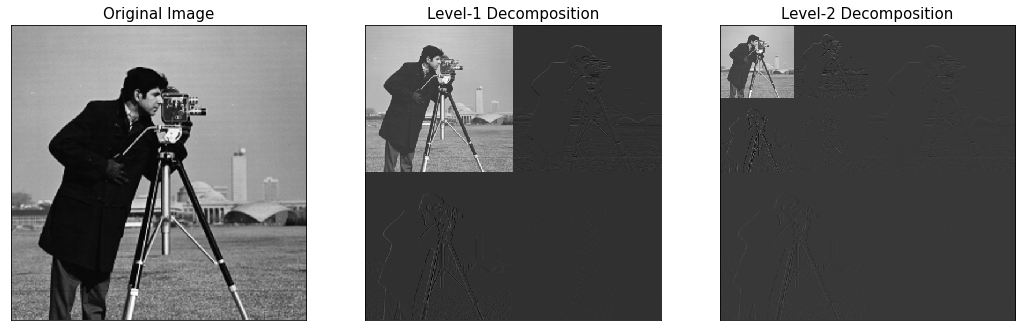

In [7]:
# Load image
original = pywt.data.camera()

fig = plt.figure(figsize=(18, 6))
image_1 = wavelet_decomposition_1(original)
image_2 = wavelet_decomposition_2(original)

tmp = fig.add_subplot(1, 3, 1)
tmp.imshow(original, interpolation="nearest", cmap=plt.cm.gray)
tmp.set_title("Original Image", fontsize=15)
tmp.set_xticks([])
tmp.set_yticks([])

tmp = fig.add_subplot(1, 3, 2)
tmp.imshow(image_1, interpolation="nearest", cmap=plt.cm.gray)
tmp.set_title("Level-1 Decomposition", fontsize=15)
tmp.set_xticks([])
tmp.set_yticks([])

tmp = fig.add_subplot(1, 3, 3)
tmp.imshow(image_2, interpolation="nearest", cmap=plt.cm.gray)
tmp.set_title("Level-2 Decomposition", fontsize=15)
tmp.set_xticks([])
tmp.set_yticks([])

plt.show()

As you can see the result of wavelet decomposition. The subband which hold most information is the low subband and most important part (the part which hold most information) is focused at a certain area. This feature makes SPIHT implementation very effective when coding these coefficents.

```image_1``` is the result of 1-level wavelet decomposition and 
```image_2``` is the result of 2-level wavelet decomposition.

Here we define our coding method. Its algorithm is described above.

In [7]:
def spiht_coding(img0):
    img_len = len(img0)
    LIP = [(0, 0), (0, 1), (1, 0), (1, 1)]
    LIS = [['A', (0, 1)], ['A', (1, 0)], ['A', (1, 1)]]
    # LSP = []
    LSP_old = []
    LSP_new = []
    strbit = ''
    K = int(np.abs(np.log2(np.max(np.abs(img0)))))
    strbit += format(K, '05b')
    K_eva = K + 1
    # iter = K
    iter = K
    print("------------Start coding algorithm------------")
    while iter >= 0:
        print("Iter: ", iter)
        # Sorting pass LIP
        remove_index = []
        ind = 0
        while ind < len(LIP):
            i = LIP[ind]
            if S(img0[i], K) == 1:
                strbit += '1'
                strbit += signbit(img0[i])
                LSP_new.append(i)
                LIP.pop(ind)
            else:
                strbit += '0'
                ind += 1
            # print(strbit)

        # Sorting pass LIS
        ind = 0
        while ind < len(LIS):
            current_set = LIS[ind][1]

            # The set is type A
            if LIS[ind][0] == 'A':

                # Check if its descendant is significant
                sig = max([S(img0[index], K) for index in D(current_set, img_len)])
                if sig == 1:
                    strbit += '1'
                    # Check if offspring is significant before check its descendant
                    offsprings = O(current_set, img_len)
                    for offspring in offsprings:
                        if S(img0[offspring], K) == 1:
                            # print(offspring, " is significant!")
                            strbit += '1'
                            strbit += signbit(img0[offspring])
                            LSP_new.append(offspring)
                        else:
                            strbit += '0'
                            LIP.append(offspring)

                    # Since this set's descendant is significant which mean there may be
                    # another significant node which is not offspring, we check it by add
                    # a set with type B
                    L_current = L(current_set, img_len)
                    # print("L(", current_set, ")= ", L_current)
                    if L_current:
                        LIS.append(['B', current_set])
                    LIS.pop(ind)
                    continue
                else:
                    strbit += '0'

            # Type B
            else:
                # Check if L is significant
                sig = max([S(img0[index], K) for index in L(current_set, img_len)])
                if sig == 1:
                    strbit += '1'
                    offsprings = O(current_set, img_len)
                    for offspring in offsprings:
                        LIS.append(['A', offspring])
                    LIS.pop(ind)
                    continue
                else:
                    strbit += '0'
            ind += 1
        for i in LSP_old:
            value = img0[i]
            kbit = abs(int(value)) & (1 << (K))
            if kbit > 0:
                strbit += '1'
            else:
                strbit += '0'
        LSP_old = LSP_old + LSP_new
        LSP_new = []
        # devlog()
        iter -= 1
        K -= 1
    print("------------Finish coding algorithm------------")
    print("Total bit stream length: ", len(strbit))
    print("Compression ratio: ", (len(strbit))/(K_eva * img_len * img_len) * 100.0, "%")
    print("\n\n")
    return strbit

Now we will try coding above images

In [8]:
strbit_1 = spiht_coding(image_1)
strbit_2 = spiht_coding(image_2)

------------Start coding algorithm------------
Iter:  9
Iter:  8
Iter:  7
Iter:  6
Iter:  5
Iter:  4
Iter:  3
Iter:  2
Iter:  1
Iter:  0
------------Finish coding algorithm------------
Total bit stream length:  1658324
Compression ratio:  63.260040283203125 %



------------Start coding algorithm------------
Iter:  11
Iter:  10
Iter:  9
Iter:  8
Iter:  7
Iter:  6
Iter:  5
Iter:  4
Iter:  3
Iter:  2
Iter:  1
Iter:  0
------------Finish coding algorithm------------
Total bit stream length:  1681671
Compression ratio:  53.45888137817383 %





After coding them, the bit stream is returned as a string. Since it is too large, we will not display it out but the compression ratio and iteration index.

According the result, with 1-level decomposition image, the compression ratio (*63.26%*) was bigger than 2-level decomposition image (*53.46%*), which meant the compression of ```image_2``` is better. On the other hand, the bit stream length of 1-level decomposition image (*207.3 KB*) was still smaller or better than the 2-level decomposition (*210.21 KB*) since its fixed binary length is smaller (9 bit) compares to 2-level decomposition (11 bit). Compare to the original image (*about 262.14 KB*), the compression ratio of ```image_1``` is about 79.07% and ```image_2``` is 80.19%. So choosing level of decomposition will vary on the feature of data we are going to send.

The decoding process is just simply following the bit stream of encoding process as a "blueprint" of image reconstruction. At the initializing stage, both **LIS**, **LIP** and **LSP** must be the same as the encoding process and the reading function follow the same path as the output function of encoder. This is crucial since only one bit is mistakenly read may collapse the whole decoding process.

In [9]:
def spiht_decoding(strbit, img_len, level):
    # Reconstruct part
    # Take input as bits
    
    K_re = int(strbit[0:5], 2)
    img_re = [[[0 for z in range(K_re + 2)] for x in range(img_len)] for y in range(img_len)]
    LIP_re = [(0, 0), (0, 1), (1, 0), (1, 1)]
    LIS_re = [['A', (0, 1)], ['A', (1, 0)], ['A', (1, 1)]]
    # LSP = []
    LSP_old_re = []
    LSP_new_re = []
    iter_re = 5
    while iter_re < len(strbit):
        # Sorting pass LIP
        lip_ind = 0
        while lip_ind < len(LIP_re):
            if strbit[iter_re] == '1':
                img_re[LIP_re[lip_ind][0]][LIP_re[lip_ind][1]][- (K_re + 1)] = 1
                iter_re += 1
                img_re[LIP_re[lip_ind][0]][LIP_re[lip_ind][1]][0] = int(strbit[iter_re])
                iter_re += 1
                LSP_new_re.append(LIP_re[lip_ind])
                LIP_re.pop(lip_ind)
                continue
            else:
                iter_re += 1
            lip_ind += 1

        # Sorting pass LIS
        lis_ind = 0
        while lis_ind < len(LIS_re):
            current_set = LIS_re[lis_ind][1]
            # print("Visiting: ", LIS_re[lis_ind])
            # print(iter_re, " of ", strbit, " = ", strbit[iter_re])

            # The set is type A
            if LIS_re[lis_ind][0] == 'A':
                if strbit[iter_re] == '0':
                    # print("Insignificant")
                    iter_re += 1
                else:
                    # Reconstruct offsprings
                    iter_re += 1
                    offsprings = O(current_set, img_len)
                    # print("Significant!")
                    for offspring in offsprings:
                        if strbit[iter_re] == '0':
                            iter_re += 1
                            LIP_re.append(offspring)
                        else:
                            # print(offspring, " is significant")
                            img_re[offspring[0]][offspring[1]][- (K_re + 1)] = 1
                            iter_re += 1
                            img_re[offspring[0]][offspring[1]][0] = int(strbit[iter_re])
                            iter_re += 1
                            LSP_new_re.append(offspring)

                    # Add B type if necessary
                    L_current = L(current_set, img_len)
                    # print("L(", current_set, ")= ", L_current)
                    if L_current:
                        LIS_re.append(['B', current_set])
                    LIS_re.pop(lis_ind)
                    continue
            # Type B
            else:
                if strbit[iter_re] == '0':
                    iter_re += 1
                else:
                    iter_re += 1
                    offsprings = O(current_set, img_len)
                    for offspring in offsprings:
                        LIS_re.append(['A', offspring])
                    LIS_re.pop(lis_ind)
                    continue
            lis_ind += 1
        # Refinement part
        # print("Refinement part")
        # print(LSP_old_re)
        for i in LSP_old_re:
            if strbit[iter_re] == '1':
                img_re[i[0]][i[1]][- (K_re + 1)] = 1
            iter_re += 1

        LSP_old_re = LSP_old_re + LSP_new_re
        LSP_new_re = []
        K_re -= 1
        # re_devlog()
        # print(strbit[:iter_re])
        # print(iter_re)
        # print("K_re = ", K_re)
        if level >= 0:
            level -= 1
            if level <= 0:
                break
    re_img = np.array(reconstruct_img(img_re, img_len, img_len))
    return re_img
# print(img0)
# img_re = spiht_decoding(strbit, 256)
# re_img = np.array(reconstruct_img(img_re, img_len, img_len))
# re_img = re_img / 2 + 255

# plt.imshow(re_img, interpolation="nearest", cmap=plt.cm.gray)
# plt.show()

# print('Compression ratio is: ', (len(strbit)) / (img_len * img_len * 8.0))

Now we will implement decoding to the output bit stream with both ```image_1``` and ```image_2``` and reconstruct them. And for demonstration purpose, we will reconstruct other 8 levels of reconstruction of ```image_1``` to see how the image will be displayed in a progressive transmission scheme. 

In [10]:
reconstruct_img_0 = wavelet_reconstruct_1(spiht_decoding(strbit_1, 512, -1))
reconstruct_img_1 = wavelet_reconstruct_1(spiht_decoding(strbit_1, 512, 1))
reconstruct_img_2 = wavelet_reconstruct_1(spiht_decoding(strbit_1, 512, 2))
reconstruct_img_3 = wavelet_reconstruct_1(spiht_decoding(strbit_1, 512, 3))

reconstruct_img_4 = wavelet_reconstruct_1(spiht_decoding(strbit_1, 512, 4))
reconstruct_img_5 = wavelet_reconstruct_1(spiht_decoding(strbit_1, 512, 5))
reconstruct_img_6 = wavelet_reconstruct_1(spiht_decoding(strbit_1, 512, 6))

reconstruct_img_7 = wavelet_reconstruct_1(spiht_decoding(strbit_1, 512, 7))
reconstruct_img_8 = wavelet_reconstruct_1(spiht_decoding(strbit_1, 512, 8))

reconstruct_img2_0 = wavelet_reconstruct_2(spiht_decoding(strbit_2, 512, -1))

[]

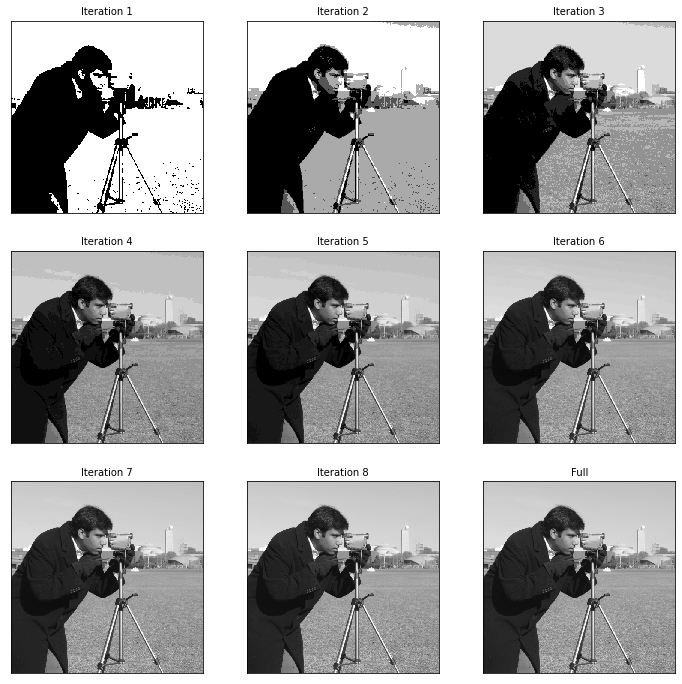

In [11]:

fig = plt.figure(figsize=(12, 12))
original_img = fig.add_subplot(3, 3, 1)
original_img.imshow(reconstruct_img_1, interpolation="nearest", cmap=plt.cm.gray)
original_img.set_title("Iteration 1", fontsize=10)
original_img.set_xticks([])
original_img.set_yticks([])


tmp = fig.add_subplot(3, 3, 2)
tmp.imshow(reconstruct_img_2, interpolation="nearest", cmap=plt.cm.gray)
tmp.set_title("Iteration 2", fontsize=10)
tmp.set_xticks([])
tmp.set_yticks([])

tmp = fig.add_subplot(3, 3, 3)
tmp.imshow(reconstruct_img_3, interpolation="nearest", cmap=plt.cm.gray)
tmp.set_title("Iteration 3", fontsize=10)
tmp.set_xticks([])
tmp.set_yticks([])

tmp = fig.add_subplot(3, 3, 4)
tmp.imshow(reconstruct_img_4, interpolation="nearest", cmap=plt.cm.gray)
tmp.set_title("Iteration 4", fontsize=10)
tmp.set_xticks([])
tmp.set_yticks([])

tmp = fig.add_subplot(3, 3, 5)
tmp.imshow(reconstruct_img_5, interpolation="nearest", cmap=plt.cm.gray)
tmp.set_title("Iteration 5", fontsize=10)
tmp.set_xticks([])
tmp.set_yticks([])

tmp = fig.add_subplot(3, 3, 6)
tmp.imshow(reconstruct_img_6, interpolation="nearest", cmap=plt.cm.gray)
tmp.set_title("Iteration 6", fontsize=10)
tmp.set_xticks([])
tmp.set_yticks([])

tmp = fig.add_subplot(3, 3, 7)
tmp.imshow(reconstruct_img_7, interpolation="nearest", cmap=plt.cm.gray)
tmp.set_title("Iteration 7", fontsize=10)
tmp.set_xticks([])
tmp.set_yticks([])

tmp = fig.add_subplot(3, 3, 8)
tmp.imshow(reconstruct_img_8, interpolation="nearest", cmap=plt.cm.gray)
tmp.set_title("Iteration 8", fontsize=10)
tmp.set_xticks([])
tmp.set_yticks([])

tmp = fig.add_subplot(3, 3, 9)
tmp.imshow(reconstruct_img_0, interpolation="nearest", cmap=plt.cm.gray)
tmp.set_title("Full", fontsize=10)
tmp.set_xticks([])
tmp.set_yticks([])

Above is 9 iteration of reconstruction of ```image_1```. As we can see from first iteration, we have seen the detail structure of the image. From the iteration 6, the image we perceive is nearly perfect although its coefficents have not been completed.

Lastly, let's consider the PSNR of our compressions. Peak signal-to-noise ratio (PSNR) is  the ratio between the maximum possible power of a signal and the power of corrupting noise that affects the fidelity of its representation. [5] The bigger the PSNR is, the better the reconstruction quality is.
$$PSNR = 10 \cdot log_{10}(\frac{MAX^{2}_{I}}{MSE})$$
Here, $MAX_{I}$ is the maximum possible pixel value of the image. With our example, each pixel is 8 bit so the $MAX_{I} = 255$. Since the reconstructed images are still in ```float64``` type, we will perform rounding pixels before calculating the PSNR value of both images.

In [58]:
psnr = cv2.PSNR(np.around(reconstruct_img_0).astype(original.dtype), original)
print("Image_0 PSNR = ", psnr)
psnr = cv2.PSNR(np.around(reconstruct_img2_0).astype(original.dtype), original)
print("Image_1 PSNR = ", psnr)


Image_0 PSNR =  43.20447220931244
Image_1 PSNR =  48.04632697430712


The image reconstructed from 1-level wavelet decomposition has PSNR approximately *43.2 dB*, which was smaller than the one from 2-level decomposition (*48.05 dB*). That mean the 2-level wavelet decomposition has better quality. But with the bits depth is 8, both methods of decomposition has provided good quality reconstructed image.

## Conclusion
Image compression implementing SPIHT coding has many strengths. One of them is the progressive transmission scheme which we have discussed. Hence, SPIHT is implemented in many field such as ECG signal compression, video compression or video streaming,... Its algorithm is complex but the main idea is simply set partitions in the spatial orientation tree which form from the data.

SPIHT is a good implementation in wavelet transform because after the transformation, most of the energy focuses on a certain area so SPIHT can easily set partitions and transform more important part first and simultaneously get rid of sending unsignificant bits.

The compression quality varies on how we decompose the image. The more depth level of wavelet decomposition, the better quality of the reconstruction image but its tradeoff is the bigger bit stream as we analyzed. So based on our compression purpose and requirements, we can choose the most suitable decomposing method.


## Reference
[1] https://en.wikipedia.org/wiki/Wavelet_transform

[2] https://en.wikipedia.org/wiki/Embedded_Zerotrees_of_Wavelet_transforms

[3] Pooyan, et al. 2005, Wavelet Compression of ECG Signals Using SPIHT Algorithm

[4] A. Said, W. A. Pearlman, et al. A new, fast, and efficient image codec based on setpartitioning in hierarchical trees. IEEE Transactions on circuits and systems for videotechnology, 6(3):243–250, 1996

[5] https://en.wikipedia.org/wiki/Peak_signal-to-noise_ratio